<a href="https://colab.research.google.com/github/Tiwari666/pyspark/blob/main/Classification_Pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=0965cb15e3521fb3b1dd25840411ee60d62a530690c5f4ca566d8fb78f926cec
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
import pyspark
from pyspark.sql import SparkSession

In [ ]:
sparkSession = SparkSession.builder.appName('ML_Exercise').getOrCreate()
sparkSession

In [ ]:

df=sparkSession.read.csv('/content/BankCustomerChurn.csv',header=True,inferSchema=True)
df.show()

+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId|  Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        1|  15634602| Hargrave|        619|   France|Female| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|
|        2|  15647311|     Hill|        608|    Spain|Female| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|
|        3|  15619304|     Onio|        502|   France|Female| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        4|  15701354|     Boni|        699|   France|Female| 39|     1|      0.0|            2|        0|             0|       93

In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum

In [ ]:
from pyspark.sql.functions import col, isnan, sum as sql_sum

# Check for NaN values in each column
nan_counts = df.select([sql_sum(col(c).isNull().cast("integer") + isnan(col(c)).cast("integer")).alias(c) for c in df.columns])

# Show the sum of NaN values in each column
nan_counts.show()

+---------+----------+-------+-----------+---------+------+---+------+-------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId|Surname|CreditScore|Geography|Gender|Age|Tenure|Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+-------+-----------+---------+------+---+------+-------+-------------+---------+--------------+---------------+------+
|        0|         0|      0|          0|        0|     0|  0|     0|      0|            0|        0|             0|              0|     0|
+---------+----------+-------+-----------+---------+------+---+------+-------+-------------+---------+--------------+---------------+------+



# Data Exploration:

Distribution of numerical features:

In [ ]:
numerical_cols = [c[0] for c in df.dtypes if c[1] in ['int', 'double']]
df.select(numerical_cols).describe().show()

+-------+------------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+-------------------+-------------------+-----------------+-------------------+
|summary|         RowNumber|       CustomerId|      CreditScore|               Age|            Tenure|          Balance|     NumOfProducts|          HasCrCard|     IsActiveMember|  EstimatedSalary|             Exited|
+-------+------------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+-------------------+-------------------+-----------------+-------------------+
|  count|             10000|            10000|            10000|             10000|             10000|            10000|             10000|              10000|              10000|            10000|              10000|
|   mean|            5000.5|  1.56909405694E7|         650.5288|           38.9218|            5.0128|76485.88928799961|        

In [ ]:
df.describe().show()

+-------+------------------+-----------------+-------+-----------------+---------+------+------------------+------------------+-----------------+------------------+-------------------+-------------------+-----------------+-------------------+
|summary|         RowNumber|       CustomerId|Surname|      CreditScore|Geography|Gender|               Age|            Tenure|          Balance|     NumOfProducts|          HasCrCard|     IsActiveMember|  EstimatedSalary|             Exited|
+-------+------------------+-----------------+-------+-----------------+---------+------+------------------+------------------+-----------------+------------------+-------------------+-------------------+-----------------+-------------------+
|  count|             10000|            10000|  10000|            10000|    10000| 10000|             10000|             10000|            10000|             10000|              10000|              10000|            10000|              10000|
|   mean|            5000.5|

# **Distribution of categorical features:**

In [ ]:
categorical_cols = [c[0] for c in df.dtypes if c[1] == 'string']
for col in categorical_cols:
    df.groupBy(col).count().show()

+------------+-----+
|     Surname|count|
+------------+-----+
|       Tyler|    4|
|     Palermo|   12|
|      Piccio|   13|
|    Lazareva|    3|
|  Kambinachi|    5|
|       Virgo|    2|
| Baryshnikov|    2|
|     Wofford|    1|
|      Lavrov|    2|
|   Bezrukova|    2|
|      Avdeev|    1|
|      Clunie|    1|
|      Duigan|    2|
|    Sokolova|    2|
|      Azarov|    1|
|    Rawlings|    1|
|         Zox|    1|
|       Rubeo|    1|
|      Arbour|    1|
|Rapuluchukwu|    1|
+------------+-----+
only showing top 20 rows

+---------+-----+
|Geography|count|
+---------+-----+
|  Germany| 2509|
|   France| 5014|
|    Spain| 2477|
+---------+-----+

+------+-----+
|Gender|count|
+------+-----+
|Female| 4543|
|  Male| 5457|
+------+-----+



# **Data Visualization:**

In PySpark, we typically use distributed computing to handle large datasets. However, when it comes to data visualization, PySpark itself does not have built-in visualization capabilities like Pandas or other data visualization libraries. Therefore, to visualize data in PySpark, we typically convert our PySpark DataFrame into a Pandas DataFrame and then use Pandas or other libraries like Matplotlib, Seaborn, or Plotly for visualization.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession

In [ ]:
# Convert Spark DataFrame to Pandas DataFrame
pandas_df = df.toPandas()
pandas_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


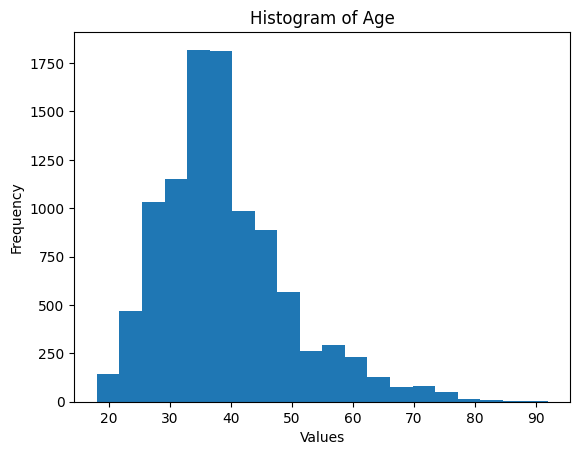

In [ ]:
# Perform data visualization using Pandas and Matplotlib or Seaborn
# Example: Histogram
plt.hist(pandas_df['Age'], bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

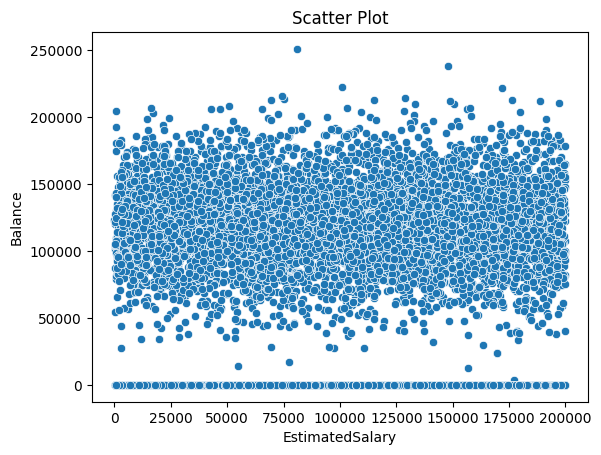

In [ ]:
# Example: Scatter Plot
sns.scatterplot(data=pandas_df, x='EstimatedSalary', y='Balance')
plt.xlabel('EstimatedSalary')
plt.ylabel('Balance')
plt.title('Scatter Plot')
plt.show()

# **Preprocessing**

# **Converting categorical to numeric data**

In [ ]:
df.show()

+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId|  Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        1|  15634602| Hargrave|        619|   France|Female| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|
|        2|  15647311|     Hill|        608|    Spain|Female| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|
|        3|  15619304|     Onio|        502|   France|Female| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        4|  15701354|     Boni|        699|   France|Female| 39|     1|      0.0|            2|        0|             0|       93

In [ ]:
# Drop a Surname column
df = df.drop('Surname')

# Show the DataFrame after dropping the column
df.show()

+---------+----------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        1|  15634602|        619|   France|Female| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|
|        2|  15647311|        608|    Spain|Female| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|
|        3|  15619304|        502|   France|Female| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        4|  15701354|        699|   France|Female| 39|     1|      0.0|            2|        0|             0|       93826.63|     0|
|        5|  15737888|        850|    Spain|Female| 43|

In [ ]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [ ]:
categorical_cols = ['Geography', 'Gender']
for col in categorical_cols:
    indexer = StringIndexer(inputCol=col, outputCol=col+'_index')
    df = indexer.fit(df).transform(df).drop(col)

In [ ]:
df.show()

+---------+----------+-----------+---+------+---------+-------------+---------+--------------+---------------+------+---------------+------------+
|RowNumber|CustomerId|CreditScore|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|Geography_index|Gender_index|
+---------+----------+-----------+---+------+---------+-------------+---------+--------------+---------------+------+---------------+------------+
|        1|  15634602|        619| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|            0.0|         1.0|
|        2|  15647311|        608| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|            2.0|         1.0|
|        3|  15619304|        502| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|            0.0|         1.0|
|        4|  15701354|        699| 39|     1|      0.0|            2|        0|             0|       93826.63|     0| 

# **VectorAssembler: combining columns into a single feature vector:**
In PySpark, a VectorAssembler is a transformer that combines a given list of columns into a single vector column. It is commonly used in feature engineering when preparing data for machine learning models, especially when working with Spark's MLlib library. The assembled vector column can then be used as input for machine learning algorithms.

In [ ]:
feature_cols = [col for col in df.columns if col not in ['RowNumber', 'CustomerId', 'Surname', 'Exited']]
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
df = assembler.transform(df).select('features', 'Exited')

In [ ]:
df.show()

+--------------------+------+
|            features|Exited|
+--------------------+------+
|[619.0,42.0,2.0,0...|     1|
|[608.0,41.0,1.0,8...|     0|
|[502.0,42.0,8.0,1...|     1|
|[699.0,39.0,1.0,0...|     0|
|[850.0,43.0,2.0,1...|     0|
|[645.0,44.0,8.0,1...|     1|
|[822.0,50.0,7.0,0...|     0|
|[376.0,29.0,4.0,1...|     1|
|[501.0,44.0,4.0,1...|     0|
|[684.0,27.0,2.0,1...|     0|
|[528.0,31.0,6.0,1...|     0|
|[497.0,24.0,3.0,0...|     0|
|[476.0,34.0,10.0,...|     0|
|[549.0,25.0,5.0,0...|     0|
|[635.0,35.0,7.0,0...|     0|
|[616.0,45.0,3.0,1...|     0|
|[653.0,58.0,1.0,1...|     1|
|[549.0,24.0,9.0,0...|     0|
|[587.0,45.0,6.0,0...|     0|
|[726.0,24.0,6.0,0...|     0|
+--------------------+------+
only showing top 20 rows



# **Train Test split**

In [ ]:
train_data, test_data = df.randomSplit([0.7, 0.3])

# **MODEL BUILDING:**

In [ ]:
rf = RandomForestClassifier(featuresCol='features', labelCol='Exited')
model = rf.fit(train_data)

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.functions import col

# Define a function to calculate evaluation metrics
def evaluate_model(predictions):
    # Binary classification evaluator
    binary_evaluator = BinaryClassificationEvaluator(labelCol='Exited')
    # Area under ROC curve
    auc = binary_evaluator.evaluate(predictions, {binary_evaluator.metricName: 'areaUnderROC'})

    # Multiclass classification evaluator
    multiclass_evaluator = MulticlassClassificationEvaluator(labelCol='Exited', metricName='accuracy')
    # Accuracy
    accuracy = multiclass_evaluator.evaluate(predictions)

    # Convert the 'Exited' column to DoubleType to ensure compatibility
    predictions = predictions.withColumn('Exited', col('Exited').cast('double'))

    # Confusion matrix
    prediction_and_label = predictions.select(['prediction', 'Exited']).rdd
    metrics = MulticlassMetrics(prediction_and_label)
    confusion_matrix = metrics.confusionMatrix().toArray()

    # Precision, Recall, and F1-score
    precision = metrics.precision(label=1.0)
    recall = metrics.recall(label=1.0)
    f1_score = metrics.fMeasure(label=1.0)

    # Display the evaluation metrics
    print("Area under ROC: {:.4f}".format(auc))
    print("Accuracy: {:.4f}".format(accuracy))
    print("Confusion Matrix:")
    print(confusion_matrix)
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1 Score: {:.4f}".format(f1_score))

# with 'predictions' being the DataFrame containing model predictions
evaluate_model(predictions)

Area under ROC: 0.8195
Accuracy: 0.8634
Confusion Matrix:
[[2303.   70.]
 [ 332.  237.]]
Precision: 0.7720
Recall: 0.4165
F1 Score: 0.5411


# **Prediction:**

In [ ]:
from pyspark.ml.linalg import Vectors

#  'df' contains a column named 'features'
# Collect the 'features' column and convert it to a list or array
features_list = df.select('features').collect()[0][0]

# Create a DenseVector from the features list
features_vector = Vectors.dense(features_list)

# Create a DataFrame with a single row containing the features vector
new_data = sparkSession.createDataFrame([(features_vector,)], ['features'])

# Make predictions using the model
prediction = model.transform(new_data)

# Display the prediction
prediction.select('prediction').show()

+----------+
|prediction|
+----------+
|       0.0|
+----------+

